In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!git clone https://github.com/ahmedramadan96/EALPR.git

Cloning into 'EALPR'...
remote: Enumerating objects: 18740, done.
remote: Counting objects: 100% (12906/12906), done.
remote: Compressing objects: 100% (12903/12903), done.
remote: Total 18740 (delta 12), reused 12892 (delta 3), pack-reused 5834
Receiving objects: 100% (18740/18740), 273.19 MiB | 11.17 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (18735/18735), done.


In [ ]:
import os
import pandas as pd

In [ ]:
path = 'EALPR/EALPR Vechicles dataset/Vehicles Labeling'
labels_dict = dict(filepath=[],center_x=[],center_y=[],bb_w=[],bb_h=[])
for filename in os.listdir(path):
    filePath=path+"/"+filename
    with open(filePath) as cur:
        info = cur.readline()
        info=info.split()
        if len(info)<5:
            continue
        labels_dict['filepath'].append(filePath)
        labels_dict['center_x'].append(float(info[1]))    # center x of the bounding box
        labels_dict['center_y'].append(float(info[2]))   # center y of the bounding box
        labels_dict['bb_w'].append(float(info[3]))    # weight of bounding box
        labels_dict['bb_h'].append(float(info[4]))   # height of bounding box
        cur.close()

In [ ]:
df = pd.DataFrame(labels_dict)
df.to_csv('vehicles_labels.csv',index=False)
df.head()

,filepath,center_x,center_y,bb_w,bb_h
0,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.667000,0.651000,0.140000,0.092000
1,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.539048,0.646429,0.194286,0.084286
2,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.673333,0.485778,0.235556,0.096889
3,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.464062,0.890278,0.178125,0.100000
4,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.542361,0.478646,0.134722,0.059375


In [ ]:
df['filepath'][0]

'EALPR/EALPR Vechicles dataset/Vehicles Labeling/0759.txt'

In [ ]:
def find_files(filename, search_path):
    result = []
# Wlaking top-down from the root
    for root, dir, files in os.walk(search_path):
         if filename in files:
                result.append(os.path.join(root, filename))
    return result

In [ ]:
filename = df['filepath'][0]
def getFilename(filename):
    filename_image =filename.split('/')[3].split('.')[0]+'.jpg'
    if len(find_files(filename_image,'EALPR/EALPR Vechicles dataset/Vehicles'))==0:
        filename_image =filename.split('/')[3].split('.')[0]+'.JPG'
    if len(find_files(filename_image,'EALPR/EALPR Vechicles dataset/Vehicles'))==0:
        filename_image =filename.split('/')[3].split('.')[0]+'.jpeg'
    filepath_image = os.path.join('EALPR/EALPR Vechicles dataset/Vehicles',filename_image)
    return filepath_image
print(getFilename(filename))

EALPR/EALPR Vechicles dataset/Vehicles/0759.jpg


In [ ]:
df['filename']= list(df['filepath'].apply(getFilename))

In [ ]:
df.head()

,filepath,center_x,center_y,bb_w,bb_h,filename
0,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.667000,0.651000,0.140000,0.092000,EALPR/EALPR Vechicles dataset/Vehicles/0759.jpg
1,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.539048,0.646429,0.194286,0.084286,EALPR/EALPR Vechicles dataset/Vehicles/1866.jpg
2,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.673333,0.485778,0.235556,0.096889,EALPR/EALPR Vechicles dataset/Vehicles/1418.jpg
3,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.464062,0.890278,0.178125,0.100000,EALPR/EALPR Vechicles dataset/Vehicles/0769.jpg
4,EALPR/EALPR Vechicles dataset/Vehicles Labelin...,0.542361,0.478646,0.134722,0.059375,EALPR/EALPR Vechicles dataset/Vehicles/1822.jpg


In [ ]:
df.drop(columns=['filepath'],inplace=True)
df.head()

,center_x,center_y,bb_w,bb_h,filename
0,0.667000,0.651000,0.140000,0.092000,EALPR/EALPR Vechicles dataset/Vehicles/0759.jpg
1,0.539048,0.646429,0.194286,0.084286,EALPR/EALPR Vechicles dataset/Vehicles/1866.jpg
2,0.673333,0.485778,0.235556,0.096889,EALPR/EALPR Vechicles dataset/Vehicles/1418.jpg
3,0.464062,0.890278,0.178125,0.100000,EALPR/EALPR Vechicles dataset/Vehicles/0769.jpg
4,0.542361,0.478646,0.134722,0.059375,EALPR/EALPR Vechicles dataset/Vehicles/1822.jpg


In [ ]:
df=df[['filename','center_x','center_y','bb_w','bb_h']]
df.head()

,filename,center_x,center_y,bb_w,bb_h
0,EALPR/EALPR Vechicles dataset/Vehicles/0759.jpg,0.667000,0.651000,0.140000,0.092000
1,EALPR/EALPR Vechicles dataset/Vehicles/1866.jpg,0.539048,0.646429,0.194286,0.084286
2,EALPR/EALPR Vechicles dataset/Vehicles/1418.jpg,0.673333,0.485778,0.235556,0.096889
3,EALPR/EALPR Vechicles dataset/Vehicles/0769.jpg,0.464062,0.890278,0.178125,0.100000
4,EALPR/EALPR Vechicles dataset/Vehicles/1822.jpg,0.542361,0.478646,0.134722,0.059375


In [ ]:
df.shape

(2087, 5)

In [ ]:
df_train = df.iloc[:1462] #train
df_test = df.iloc[1462:1774] #test 15%
df_val = df.iloc[1774:] # val 15%

In [ ]:
path='./data_images'
os.mkdir(path)
os.mkdir(path +'/train')
os.mkdir(path+'/test')
os.mkdir(path+'/val')

In [ ]:
 df_train['filename'][0]

'EALPR/EALPR Vechicles dataset/Vehicles/0759.jpg'

In [ ]:
import shutil
original_images=r'./EALPR/EALPR Vechicles dataset/Vehicles/'
original_labels=r'./EALPR/EALPR Vechicles dataset/Vehicles Labeling/'
target = r'./data_images/train/'
for x in df_train['filename']:
    name=x.split('/')[3]
    shutil.copyfile(str(original_images+name),str(target+name))
    shutil.copyfile(str(original_labels+name.split('.')[0]+'.txt'),str(target+name.split('.')[0]+'.txt'))

In [ ]:
import shutil
original_images=r'./EALPR/EALPR Vechicles dataset/Vehicles/'
original_labels=r'./EALPR/EALPR Vechicles dataset/Vehicles Labeling/'
target = r'./data_images/test/'
for x in df_test['filename']:
    name=x.split('/')[3]
    shutil.copyfile(str(original_images+name),str(target+name))
    shutil.copyfile(str(original_labels+name.split('.')[0]+'.txt'),str(target+name.split('.')[0]+'.txt'))

In [ ]:
import shutil
original_images=r'./EALPR/EALPR Vechicles dataset/Vehicles/'
original_labels=r'./EALPR/EALPR Vechicles dataset/Vehicles Labeling/'
target = r'./data_images/val/'
for x in df_val['filename']:
    name=x.split('/')[3]
    shutil.copyfile(str(original_images+name),str(target+name))
    shutil.copyfile(str(original_labels+name.split('.')[0]+'.txt'),str(target+name.split('.')[0]+'.txt'))

In [ ]:
(len(os.listdir("/content/data_images/train"))+len(os.listdir("/content/data_images/test"))+len(os.listdir("/content/data_images/val")))/2

2087.0

In [ ]:
shutil.copyfile(str("/content/gdrive/MyDrive/data (1).yaml"),str("./data_images/data.yaml"))

'./data_images/data.yaml'

In [ ]:
!git clone https://github.com/WongKinYiu/yolov7 # clone repo
%cd yolov7
# Install dependencies
%pip install -qr requirements.txt  # install dependencies

%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov7'...
remote: Enumerating objects: 1127, done.
remote: Total 1127 (delta 0), reused 0 (delta 0), pack-reused 1127
Receiving objects: 100% (1127/1127), 69.93 MiB | 9.36 MiB/s, done.
Resolving deltas: 100% (522/522), done.
/content/yolov7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.7 MB/s eta 0:00:00
/content
Setup complete. Using torch 1.13.1+cu116 (Tesla T4)


In [ ]:
%cd yolov7

/content/yolov7


In [ ]:
os.listdir("/content/yolov7/data/")

['coco.yaml',
 'hyp.scratch.tiny.yaml',
 'hyp.scratch.p6.yaml',
 'hyp.scratch.custom.yaml',
 'hyp.scratch.p5.yaml']

In [ ]:
shutil.copyfile(str("/content/data_images/data.yaml"),str("/content/yolov7/data/data.yaml"))

'/content/yolov7/data/data.yaml'

In [ ]:
!wandb disabled
!python train.py --img 704 --batch 16 --epochs 50 --data /content/data_images/data.yaml  --weights 'yolov7.pt'

/bin/bash: wandb: command not found
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='/content/data_images/data.yaml', device='', entity=None, epochs=50, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[704, 704], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp6', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='yolov7.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmu

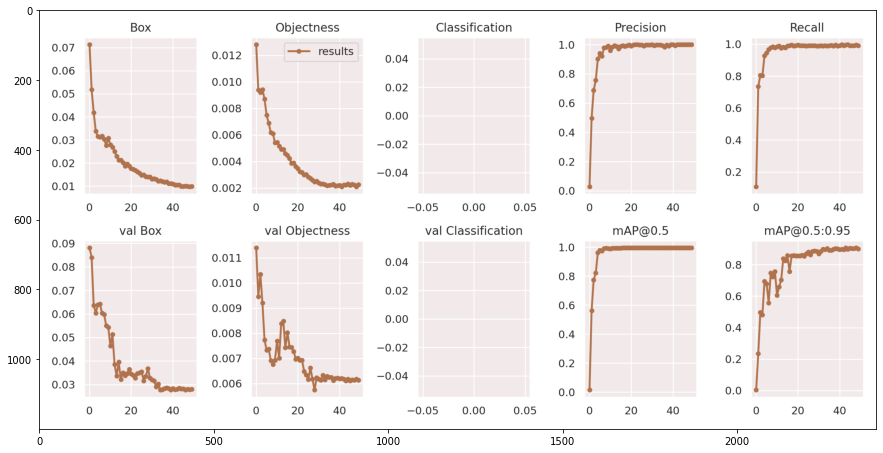

In [ ]:
from matplotlib import pyplot as plt
import cv2 as cv
img = cv.imread("/content/yolov7/runs/train/exp6/results.png")
plt.figure(figsize=(15, 15))
plt.imshow(img)

In [ ]:
os.mkdir("/content/model_7")

In [ ]:
all=os.listdir("/content/yolov7/runs/train/exp6/")
all.remove('weights')
for x in all:
    shutil.copyfile(str("/content/yolov7/runs/train/exp6/"+x),str("/content/model_7/"+x))

In [ ]:
shutil.copyfile(str("/content/yolov7/runs/train/exp6/weights/best.pt"),str("/content/model_7/best.pt"))
shutil.copyfile(str("/content/yolov7/runs/train/exp6/weights/last.pt"),str("/content/model_7/last.pt"))

'/content/model_7/last.pt'

In [ ]:
!zip -r /content/model7.zip /content/model_7

  adding: content/model_7/ (stored 0%)
  adding: content/model_7/test_batch1_pred.jpg (deflated 2%)
  adding: content/model_7/train_batch5.jpg (deflated 3%)
  adding: content/model_7/train_batch0.jpg (deflated 3%)
  adding: content/model_7/hyp.yaml (deflated 44%)
  adding: content/model_7/P_curve.png (deflated 24%)
  adding: content/model_7/test_batch1_labels.jpg (deflated 2%)
  adding: content/model_7/events.out.tfevents.1675372518.e3235a6d9525.7973.0 (deflated 71%)
  adding: content/model_7/results.txt (deflated 78%)
  adding: content/model_7/F1_curve.png (deflated 23%)
  adding: content/model_7/train_batch2.jpg (deflated 2%)
  adding: content/model_7/results.png (deflated 11%)
  adding: content/model_7/PR_curve.png (deflated 29%)
  adding: content/model_7/last.pt (deflated 8%)
  adding: content/model_7/train_batch6.jpg (deflated 3%)
  adding: content/model_7/test_batch2_pred.jpg (deflated 8%)
  adding: content/model_7/train_batch3.jpg (deflated 4%)
  adding: content/model_7/opt.yaml

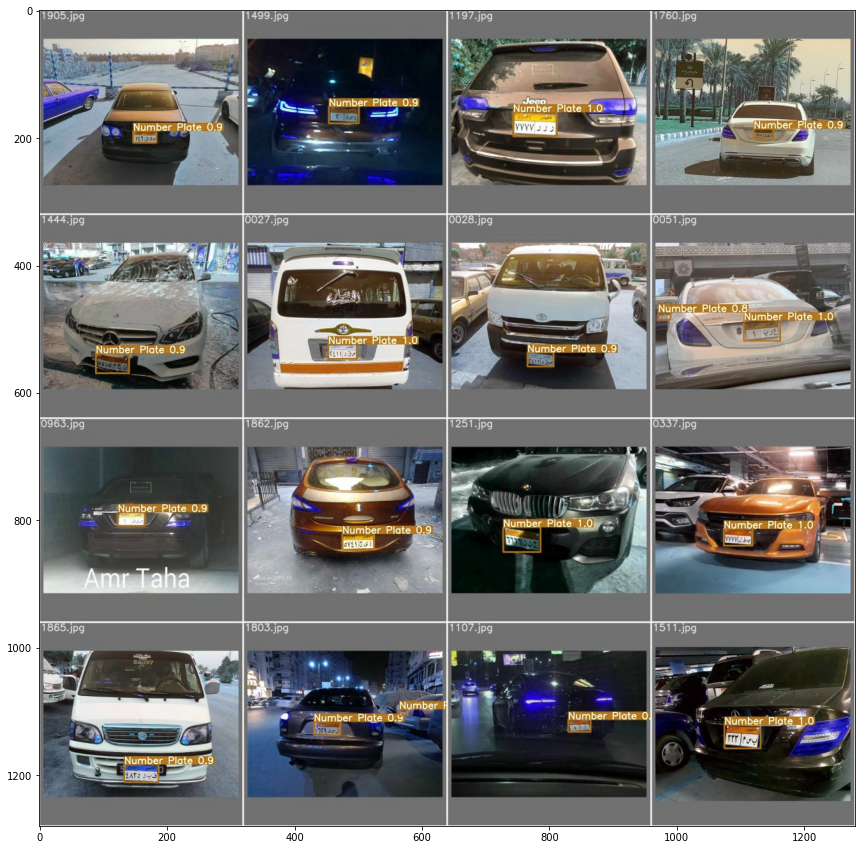

In [ ]:
img = cv.imread("/content/yolov7/runs/train/exp6/test_batch2_pred.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(img)

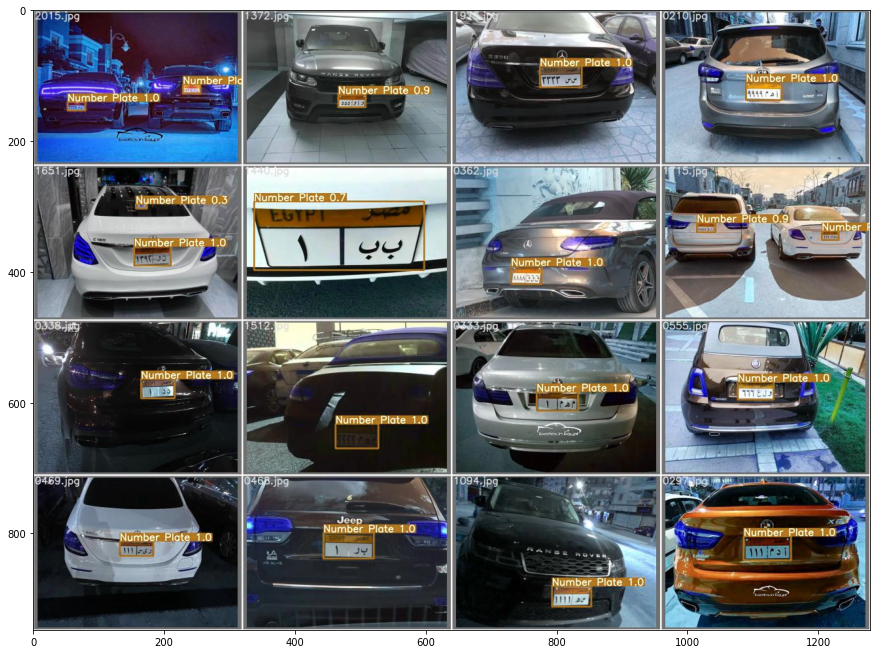

In [ ]:
img = cv.imread("/content/yolov7/runs/train/exp6/test_batch1_pred.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(img);

In [ ]:
!zip -r /content/test_model7.zip /content/yolov7/runs/test/exp2

  adding: content/yolov7/runs/test/exp2/ (stored 0%)
  adding: content/yolov7/runs/test/exp2/test_batch1_pred.jpg (deflated 2%)
  adding: content/yolov7/runs/test/exp2/P_curve.png (deflated 24%)
  adding: content/yolov7/runs/test/exp2/test_batch1_labels.jpg (deflated 2%)
  adding: content/yolov7/runs/test/exp2/F1_curve.png (deflated 23%)
  adding: content/yolov7/runs/test/exp2/PR_curve.png (deflated 29%)
  adding: content/yolov7/runs/test/exp2/test_batch2_pred.jpg (deflated 5%)
  adding: content/yolov7/runs/test/exp2/R_curve.png (deflated 24%)
  adding: content/yolov7/runs/test/exp2/test_batch0_pred.jpg (deflated 10%)
  adding: content/yolov7/runs/test/exp2/test_batch0_labels.jpg (deflated 10%)
  adding: content/yolov7/runs/test/exp2/confusion_matrix.png (deflated 38%)
  adding: content/yolov7/runs/test/exp2/test_batch2_labels.jpg (deflated 6%)


In [ ]:
shutil.copyfile(str("/content/gdrive/MyDrive/data_test.yaml"),str("/content/data_images/data_test.yaml"))

'/content/data_images/data_test.yaml'

In [ ]:
!python test.py --weights /content/yolov7/runs/train/exp6/weights/best.pt --data /content/data_images/data_test.yaml --img 704

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/content/data_images/data_test.yaml', device='', exist_ok=False, img_size=704, iou_thres=0.65, name='exp', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', v5_metric=False, verbose=False, weights=['/content/yolov7/runs/train/exp6/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36479926 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 

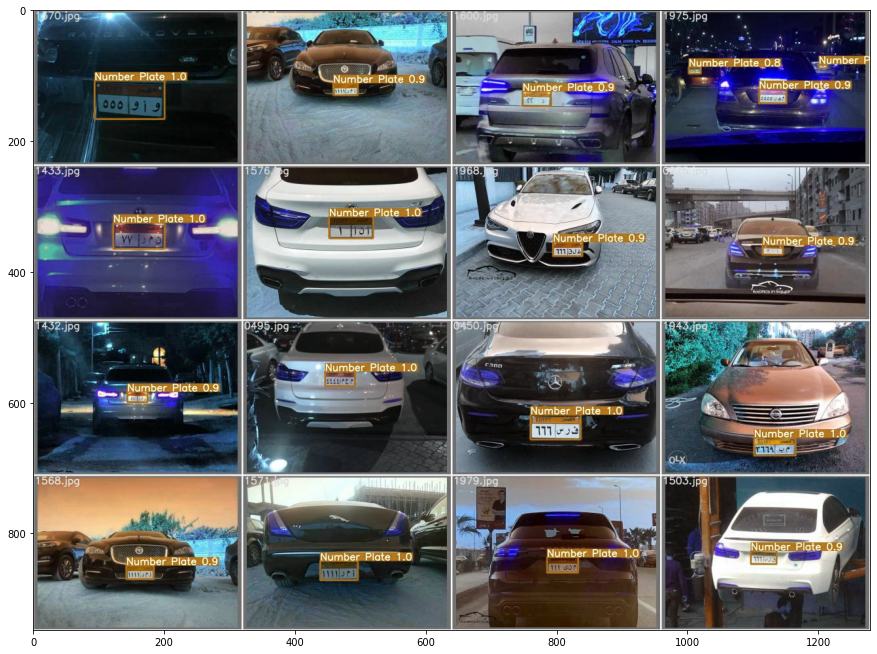

In [ ]:
img = cv.imread("/content/yolov7/runs/test/exp2/test_batch1_pred.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(img);

In [ ]:
!python detect.py --source /content/3.jpg --weights /content/yolov7/runs/train/exp6/weights/best.pt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/3.jpg', update=False, view_img=False, weights=['/content/yolov7/runs/train/exp6/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36479926 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 Nu

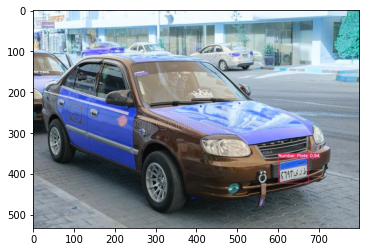

In [ ]:
img = cv.imread("/content/yolov7/runs/detect/exp/3.jpg")
plt.imshow(img)